<a href="https://colab.research.google.com/github/shipleydm/IS8036_PROJECT/blob/main/IS8036.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Python Packages

In [ ]:
 !pip install verstack

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn.utils

import lightgbm as lgb
from lightgbm import LGBMModel
import xgboost as xgb
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import ensemble
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from math import sqrt
from sklearn.metrics import r2_score
# from sklearn.utils import parallel
from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import prediction_error
from verstack import LGBMTuner



import scipy
from scipy.sparse import hstack

from google.colab import drive

Bringing Data In

In [72]:
drive.mount('/content/drive')

dir = '/content/drive/My Drive/IS8036/AirBnB/DatCleanData'

# dir = '/content/drive/MyDrive/IS8036/AirBnB/DatCleanData'

listing_data=pd.read_csv(dir+'/CLEANLISTINGS.csv')
# review_data=pd.read_csv(dir+'/reviews.csv')
# neighborhood_data=pd.read_csv(dir+'/neighbourhoods.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
listing_data.head(5)

,intListingID,strListingURL,boolInstantlyBookable,boolGuestProfilePicReqToBook,boolVerifiedGuestPhoneReqToBook,dtListingLastScraped,dtListingBookingCalendarLastScraped,dtListingFirstReview,intDaysSinceFirstReview,dtListingLastReview,...,boolHasAirConditioning,boolHasKitchen,boolHasHotWater,boolGuestPetsAllowed,boolHasTV,boolHasPool,boolHasHotTub,boolHasEVCharger,boolHasCable,boolHasInternet
0,10185917,https://www.airbnb.com/rooms/10185917,0,0,0,2020-05-31,2020-05-31,NaN,NaN,NaN,...,0,1,0,0,1,0,0,0,0,1
1,10681596,https://www.airbnb.com/rooms/10681596,0,0,0,2020-05-31,2020-05-31,NaN,NaN,NaN,...,0,1,0,0,1,0,0,0,1,1
2,10886705,https://www.airbnb.com/rooms/10886705,0,0,0,2020-05-31,2020-05-31,NaN,NaN,NaN,...,1,1,0,0,1,1,0,0,0,1
3,11023946,https://www.airbnb.com/rooms/11023946,0,0,0,2020-05-30,2020-05-30,NaN,NaN,NaN,...,1,1,0,0,1,0,0,0,0,1
4,43160258,https://www.airbnb.com/rooms/43160258,1,0,0,2020-05-31,2020-05-31,NaN,NaN,NaN,...,0,1,0,0,1,0,0,0,0,1


In [6]:
# review_data.head(5)

In [7]:
# neighborhood_data.head(5)

In [8]:
listing_data.dtypes

intListingID                        int64
strListingURL                      object
boolInstantlyBookable               int64
boolGuestProfilePicReqToBook        int64
boolVerifiedGuestPhoneReqToBook     int64
                                    ...  
boolHasPool                         int64
boolHasHotTub                       int64
boolHasEVCharger                    int64
boolHasCable                        int64
boolHasInternet                     int64
Length: 163, dtype: object

id

listing_url

scrape_id

last_scraped

name

summary

space

description

experiences_offered

neighborhood_overview

notes

transit

access

interaction

house_rules

thumbnail_url

medium_url

picture_url

xl_picture_url

host_id

host_url

host_name

host_since

host_location

host_about

host_response_time

host_response_rate

host_acceptance_rate

host_is_superhost

host_thumbnail_url

host_picture_url

host_neighbourhood

host_listings_count

host_total_listings_count

host_verifications

host_has_profile_pic

host_identity_verified

street

neighbourhood

neighbourhood_cleansed

neighbourhood_group_cleansed

city

state

zipcode

market

smart_location

country_code

country

latitude

longitude

is_location_exact

property_type

room_type

accommodates

bathrooms

bedrooms

beds

bed_type

amenities

square_feet

price

weekly_price

monthly_price

security_deposit

cleaning_fee

guests_included

extra_people

minimum_nights

maximum_nights

minimum_minimum_nights

maximum_minimum_nights

minimum_maximum_nights

maximum_maximum_nights

minimum_nights_avg_ntm

maximum_nights_avg_ntm

calendar_updated

has_availability

availability_30

availability_60

availability_90

availability_365

calendar_last_scraped

number_of_reviews

number_of_reviews_ltm

first_review

last_review

review_scores_rating

review_scores_accuracy

review_scores_cleanliness

review_scores_checkin

review_scores_communication

review_scores_location

review_scores_value

requires_license

license

jurisdiction_names

instant_bookable

is_business_travel_ready

cancellation_policy

require_guest_profile_picture

require_guest_phone_verification

calculated_host_listings_count

calculated_host_listings_count_entire_homes

calculated_host_listings_count_private_rooms

calculated_host_listings_count_shared_rooms

reviews_per_month

Cleaning/EDA/T-tests

Linear Regression

## Narrowing Down Predictors and Exploring

In [125]:
# reading the csv file using read_csv
# storing the data frame in variable called df
df = pd.read_csv(dir+'/KeepingColumns.csv', encoding="ISO-8859-1")
 
# creating a list of column names by
# calling the .columns
list_of_columns_to_keep = list(df.columns)
 
# displaying the list of column names
# print(list_of_columns_to_keep)

In [126]:
listing_df = listing_data.loc[:, list_of_columns_to_keep]
listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7221 entries, 0 to 7220
Data columns (total 93 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   boolInstantlyBookable                        7221 non-null   int64  
 1   boolGuestProfilePicReqToBook                 7221 non-null   int64  
 2   boolVerifiedGuestPhoneReqToBook              7221 non-null   int64  
 3   intDaysSinceFirstReview                      5912 non-null   float64
 4   intDaysSinceLastReview                       5912 non-null   float64
 5   intDaysSinceLastBookingCalendarUpdate        7162 non-null   float64
 6   cintNeighborhood                             7221 non-null   int64  
 7   cintZipCode                                  7221 non-null   int64  
 8   cintPropertyType                             7221 non-null   int64  
 9   ointRoomType                                 7221 non-null   int64  
 10  

In [127]:
# Define the columns to drop and the target variable
# going ahead and removing this host info as well, not being used for predictors
remove_cols = ['strHostNeighborhood', 'strHostCity', 'strHostStateProv', 'strHostCountry']
for name in remove_cols:
  if name in list_of_columns_to_keep:
    list_of_columns_to_keep.remove(name)

# final dataset with columns kept
listing_df = listing_df.loc[:, list_of_columns_to_keep]

In [128]:
# model inputs
# predictors = list_of_columns_to_keep       
# target = 'intDailyPrice'

# Split the data into training and test sets
df = listing_df # keep copy of original dataframe without the predictor being dropped
df.drop('intDailyPrice', axis=1)
df_train, df_test = train_test_split(df, test_size=0.2, random_state=41)

df_train.shape

(5776, 89)

Text(0.5, 1.0, 'Correlation matrix of numerical features')

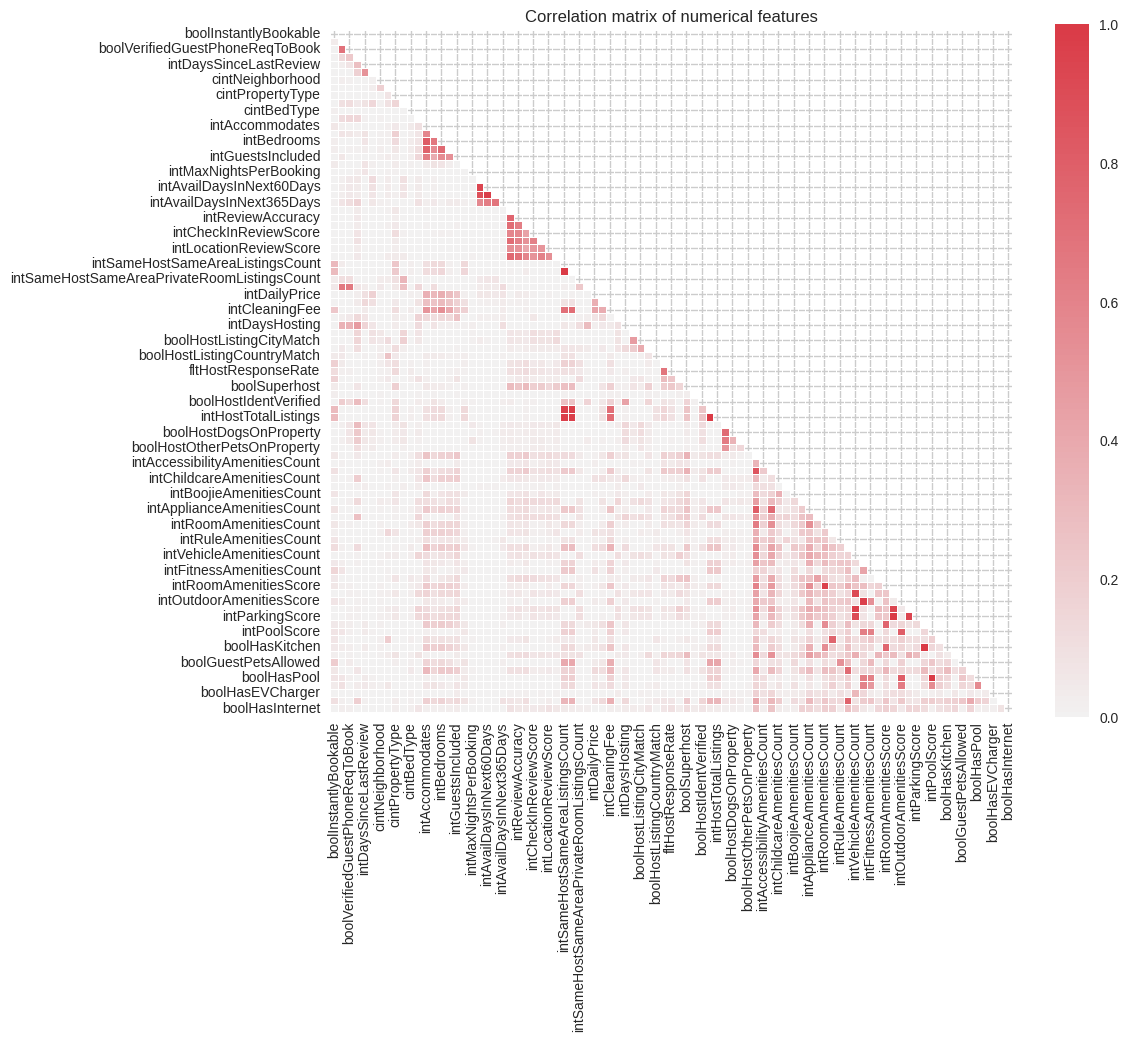

In [77]:
# correlation matrix
corr = df_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, vmin=0, vmax=1.0, square=True, linewidths=.5, cbar_kws={"shrink": 1.0});
plt.title('Correlation matrix of numerical features')

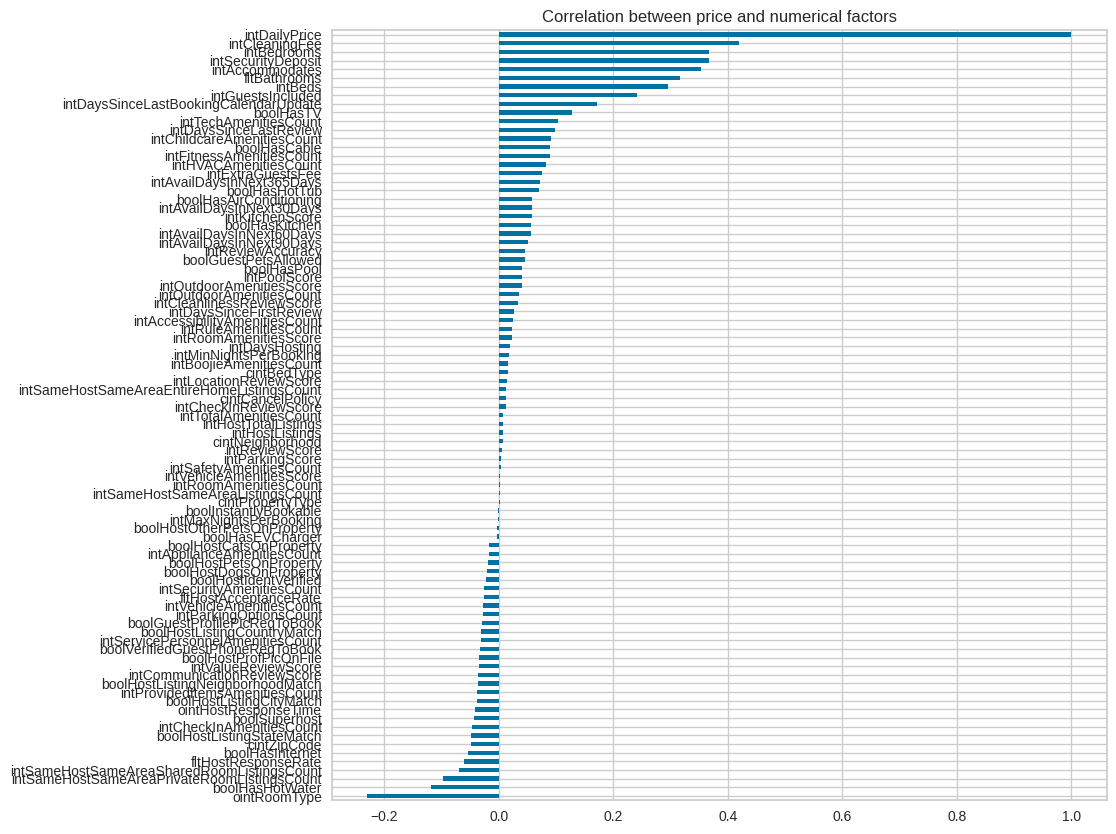

In [129]:
# double check to bring in correct column types
col = df_train.select_dtypes(['float64', 'int', 'int64']).columns

df_train[col].corr() ['intDailyPrice'].sort_values(ascending=True).dropna().plot(kind='barh', figsize=(10,10));
plt.title('Correlation between price and numerical factors');

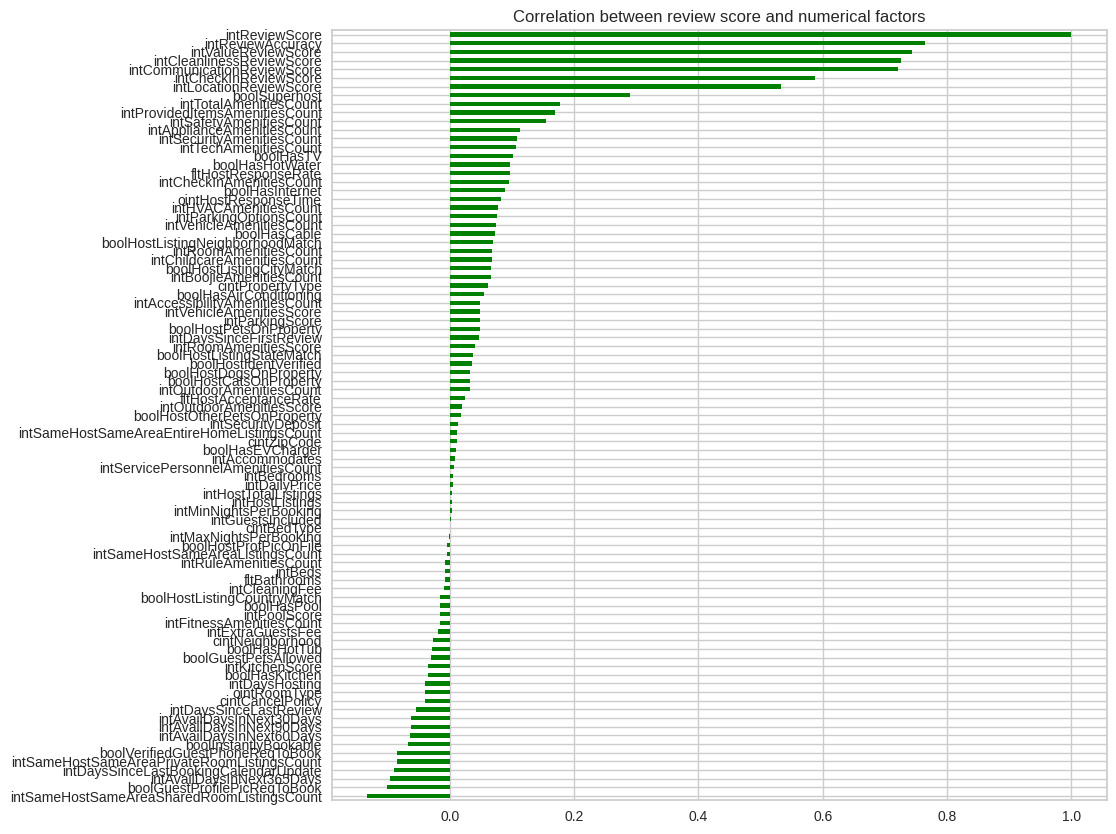

In [15]:
# below is just out of curiosity
df_train[col].corr() ['intReviewScore'].sort_values(ascending=True).dropna().plot(kind='barh', figsize=(10,10), color='green');
plt.title('Correlation between review score and numerical factors');

## Light GBM Model

In [16]:
def model_eval(X_train, y_train, X_test, y_test, model):
    '''
    input: X is features data frame, y is response, model
    output: train cross validation score, test score, predicted values
    
    '''
    model.fit(X_train, np.ravel(y_train))
    y_pred = model.predict(X_test)
    score = cross_val_score(model, X_train, y_train, scoring = 'r2', cv = 5)        # Array of R^2 scores of the estimator for each run of the cross validation.
    test_score = r2_score(y_test, y_pred)                                           # R^2 (coefficient of determination) regression score function.            
    return score, test_score, y_pred

def plot_features(X, model, name):
    '''
    plot features importance of algoritm
    input: dataframe X and regression model
    output: Feature importance plot
    '''
    print("Plot feature importances…")
    headers = ["name", "score"]
    values = sorted(zip(X.columns, model.feature_importances_), key=lambda x: x[1] * -1)
    forest_feature_importances = pd.DataFrame(values, columns = headers)
    forest_feature_importances = forest_feature_importances.sort_values(by = ['score'], ascending = False)
    features = forest_feature_importances['name'][:25]
    y_pos = np.arange(len(features))
    scores = forest_feature_importances['score'][:25]
    #plot feature importances
    plt.figure(figsize=(13,8))
    plt.barh(y_pos, scores, align='center', alpha=0.5, color='red')
    plt.yticks(y_pos, features, rotation=0)   
    plt.ylabel('Features')
    plt.xlabel('Score')
    plt.title('Feature importances ' + name)
    plt.show()

In [17]:
exc =  ['intDailyPrice']

col = [i for i in col if i not in exc]
print('Number of columns is:', len(col))
print(col)

X = df_train[col]
X_test = df_test[col]
Y = df_train['intDailyPrice']
Y_test = df_test['intDailyPrice']

Number of columns is: 88
['boolInstantlyBookable', 'boolGuestProfilePicReqToBook', 'boolVerifiedGuestPhoneReqToBook', 'intDaysSinceFirstReview', 'intDaysSinceLastReview', 'intDaysSinceLastBookingCalendarUpdate', 'cintNeighborhood', 'cintZipCode', 'cintPropertyType', 'ointRoomType', 'cintBedType', 'cintCancelPolicy', 'intAccommodates', 'fltBathrooms', 'intBedrooms', 'intBeds', 'intGuestsIncluded', 'intMinNightsPerBooking', 'intMaxNightsPerBooking', 'intAvailDaysInNext30Days', 'intAvailDaysInNext60Days', 'intAvailDaysInNext90Days', 'intAvailDaysInNext365Days', 'intReviewScore', 'intReviewAccuracy', 'intCleanlinessReviewScore', 'intCheckInReviewScore', 'intCommunicationReviewScore', 'intLocationReviewScore', 'intValueReviewScore', 'intSameHostSameAreaListingsCount', 'intSameHostSameAreaEntireHomeListingsCount', 'intSameHostSameAreaPrivateRoomListingsCount', 'intSameHostSameAreaSharedRoomListingsCount', 'intSecurityDeposit', 'intCleaningFee', 'intExtraGuestsFee', 'intDaysHosting', 'boolHos

In [18]:
model_lgb = lgb.LGBMRegressor(boosting_type ='gbdt', learning_rate = 0.1, num_leaves=31, max_depth =8) 
score, test_score, y_pred_lgbm = model_eval(X, Y, X_test, Y_test, model_lgb)

print('Number of columns is:', df_test.shape[1])
# print(df_test.columns)
print('\n')
print('LGBM Model:')
print('- Mean of crossvalidation scores:', np.mean(score))
print('- r2_score:', test_score)

Number of columns is: 89


LGBM Model:
- Mean of crossvalidation scores: 0.4703167499636411
- r2_score: 0.7441132046550835


LGBM Basic Tune

In [19]:
#
# Trying different model eval method
#
# defining parameters 
params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 31,
    'metric': {'l2','l1'},
    'verbose': -1
}
 

# loading data
lgb_train = lgb.Dataset(X, Y)
lgb_eval = lgb.Dataset(X_test, Y_test, reference=lgb_train)

# fitting the model
model = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval,
                 early_stopping_rounds=80)

[1]	valid_0's l2: 237919	valid_0's l1: 116.167
Training until validation scores don't improve for 80 rounds
[2]	valid_0's l2: 230546	valid_0's l1: 110.088
[3]	valid_0's l2: 223850	valid_0's l1: 104.363
[4]	valid_0's l2: 218014	valid_0's l1: 99.9547
[5]	valid_0's l2: 212366	valid_0's l1: 95.631
[6]	valid_0's l2: 207297	valid_0's l1: 92.368
[7]	valid_0's l2: 202572	valid_0's l1: 89.516
[8]	valid_0's l2: 198278	valid_0's l1: 87.0977
[9]	valid_0's l2: 195416	valid_0's l1: 84.8743
[10]	valid_0's l2: 190918	valid_0's l1: 82.5317
[11]	valid_0's l2: 186828	valid_0's l1: 80.8912
[12]	valid_0's l2: 183731	valid_0's l1: 79.4977
[13]	valid_0's l2: 181931	valid_0's l1: 78.3825
[14]	valid_0's l2: 178134	valid_0's l1: 77.3265
[15]	valid_0's l2: 175045	valid_0's l1: 76.5157
[16]	valid_0's l2: 172504	valid_0's l1: 75.4073
[17]	valid_0's l2: 169875	valid_0's l1: 74.9893
[18]	valid_0's l2: 167351	valid_0's l1: 74.5943
[19]	valid_0's l2: 164894	valid_0's l1: 74.1509
[20]	valid_0's l2: 162922	valid_0's l1:

/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[43]	valid_0's l2: 119122	valid_0's l1: 68.7684
[44]	valid_0's l2: 117353	valid_0's l1: 68.8098
[45]	valid_0's l2: 115988	valid_0's l1: 68.4684
[46]	valid_0's l2: 114532	valid_0's l1: 68.3632
[47]	valid_0's l2: 113457	valid_0's l1: 68.4039
[48]	valid_0's l2: 111786	valid_0's l1: 67.9494
[49]	valid_0's l2: 110606	valid_0's l1: 67.8656
[50]	valid_0's l2: 109408	valid_0's l1: 67.7848
[51]	valid_0's l2: 108521	valid_0's l1: 67.9401
[52]	valid_0's l2: 106934	valid_0's l1: 67.8907
[53]	valid_0's l2: 105383	valid_0's l1: 67.898
[54]	valid_0's l2: 104409	valid_0's l1: 67.645
[55]	valid_0's l2: 103243	valid_0's l1: 67.5336
[56]	valid_0's l2: 102151	valid_0's l1: 67.54
[57]	valid_0's l2: 101006	valid_0's l1: 67.4569
[58]	valid_0's l2: 100051	valid_0's l1: 67.3576
[59]	valid_0's l2: 98912.9	valid_0's l1: 67.491
[60]	valid_0's l2: 98106.9	valid_0's l1: 67.6322
[61]	valid_0's l2: 96784.1	valid_0's l1: 67.5387
[62]	valid_0's l2: 96141.9	valid_0's l1: 67.557
[63]	valid_0's l2: 94896	valid_0's l1: 67.

In [20]:
# prediction
gbm_train_preds = model.predict(X)
gbm_test_preds = model.predict(X_test)

# accuracy check
r2_train = r2_score(Y, gbm_train_preds)
mse_train = mean_squared_error(Y, gbm_train_preds)
rmse_train = mse_train**(0.5)
print('Train data accuracy')
print("R2: %.4f" % r2_train)
print("MSE: %.2f" % mse_train)
print("RMSE: %.2f" % rmse_train) 

r2 = r2_score(Y_test, gbm_test_preds)
mse = mean_squared_error(Y_test, gbm_test_preds)
rmse = mse**(0.5)
print('Test data accuracy')
print("R2: %.4f" % r2)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse) 

Train data accuracy
R2: 0.8347
MSE: 15426.58
RMSE: 124.20
Test data accuracy
R2: 0.7448
MSE: 62835.80
RMSE: 250.67


LGBM Optuna


 * Initiating LGBMTuner.fit
     . Settings:
     .. Trying 500 trials
     .. Evaluation metric: mse 
     .. Study direction: minimize mean_squared_error

     . Trial number: 0 finished
     .. Optimization score (lower-better): mean_squared_error: 32821.74357164888
     .. Evaluation score (lower-better): mse: 32821.74357164888
 ...........................................................................
     . Trial number: 1 finished
     .. Optimization score (lower-better): mean_squared_error: 51285.079964085446
     .. Evaluation score (lower-better): mse: 51285.079964085446
 ...........................................................................
     . Trial number: 2 finished
     .. Optimization score (lower-better): mean_squared_error: 29446.566976443053
     .. Evaluation score (lower-better): mse: 29446.566976443053
 ...........................................................................
     . Trial number: 3 finished
     .. Optimization score (lower-better): m

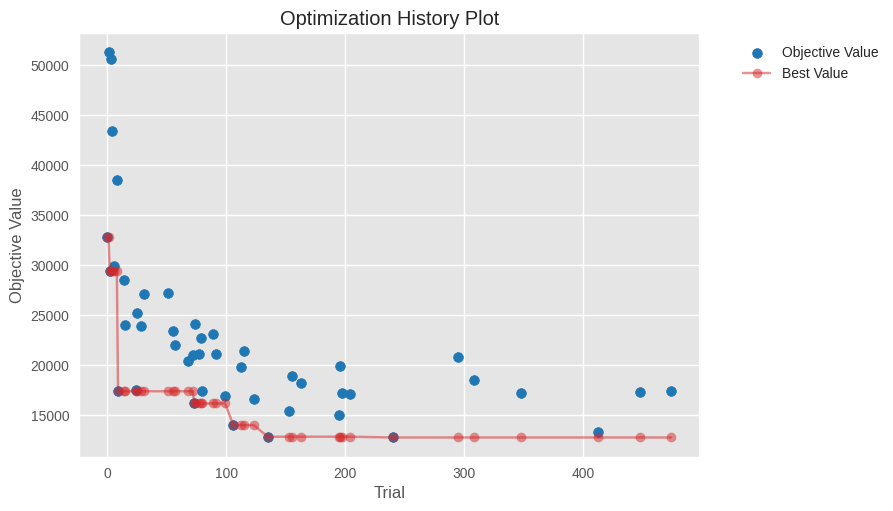

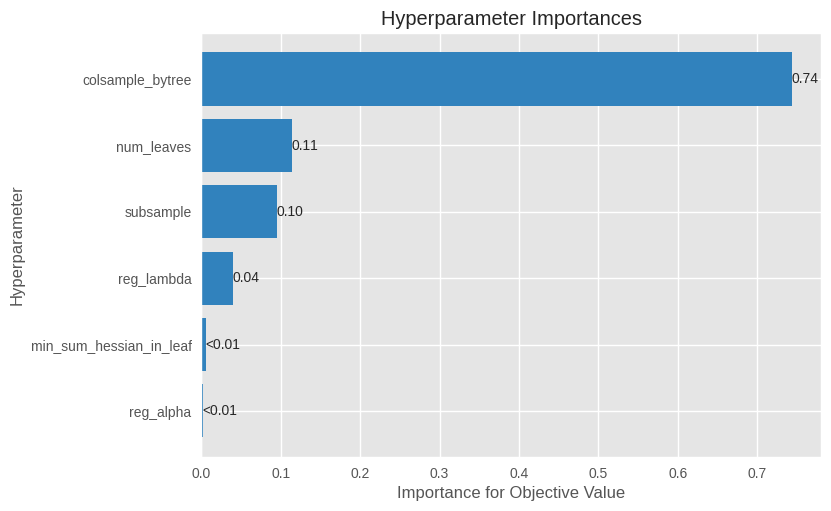

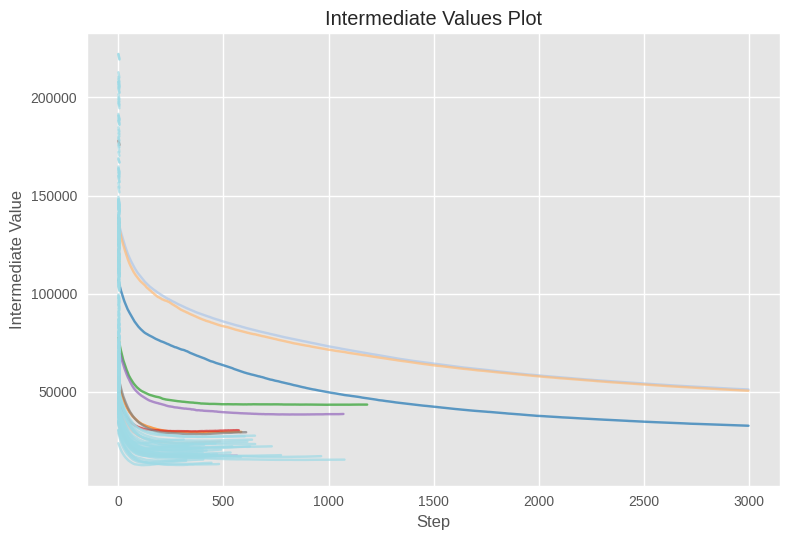

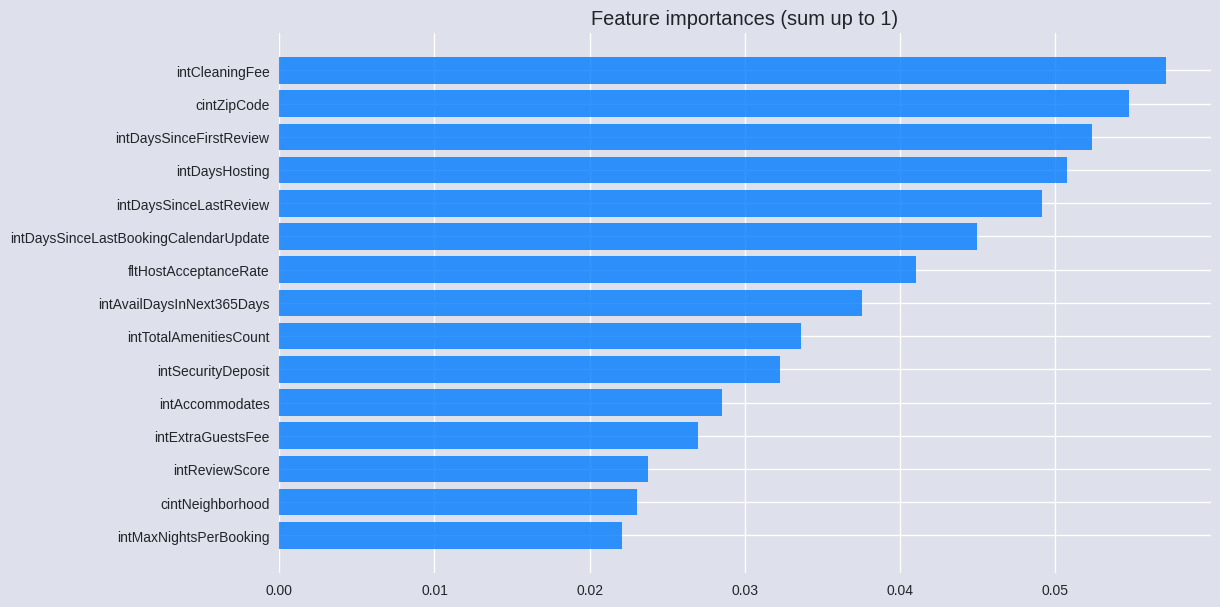


     . Optuna hyperparameters optimization finished
     .. Best trial number:240    |     mean_squared_error:           12746.528984796854
 ---------------------------------------------------------------------------
     . n_estimators optimization finished
     .. best iteration:  268   |     mse:           24040.968981768296

Time elapsed for fit execution: 12 min 2.127 sec


In [23]:
# tune the hyperparameters and fit the optimized model
tuner = LGBMTuner(metric = 'mse', trials = 500) # <- the only required argument
tuner.fit(X, Y)
# check the optimization log in the console.
# pred = tuner.predict(X_test)

In [25]:
# prediction
gbm_train_preds = tuner.predict(X)
gbm_test_preds = tuner.predict(X_test)

# accuracy check
r2_train = r2_score(Y, gbm_train_preds)
mse_train = mean_squared_error(Y, gbm_train_preds)
rmse_train = mse_train**(0.5)
print('Train data accuracy')
print("R2: %.4f" % r2_train)
print("MSE: %.2f" % mse_train)
print("RMSE: %.2f" % rmse_train) 

r2 = r2_score(Y_test, gbm_test_preds)
mse = mean_squared_error(Y_test, gbm_test_preds)
rmse = mse**(0.5)
print('Test data accuracy')
print("R2: %.4f" % r2)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse) 

Train data accuracy
R2: 0.5785
MSE: 39329.89
RMSE: 198.32
Test data accuracy
R2: 0.3771
MSE: 153375.71
RMSE: 391.63


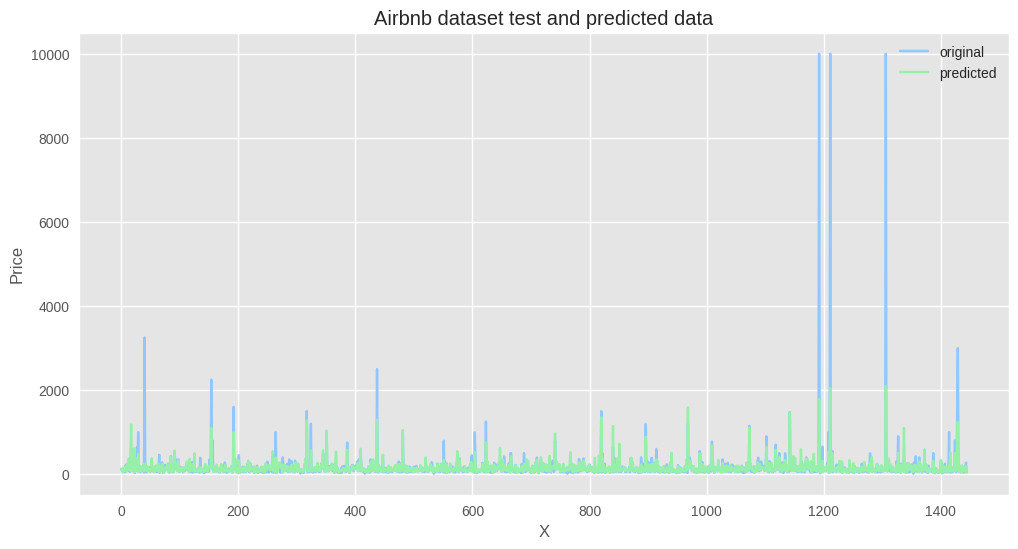

In [26]:
# visualizing in a plot
x_ax = range(len(Y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, Y_test, label="original")
plt.plot(x_ax, gbm_test_preds, label="predicted")
plt.title("Airbnb dataset test and predicted data")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

Plot feature importances…


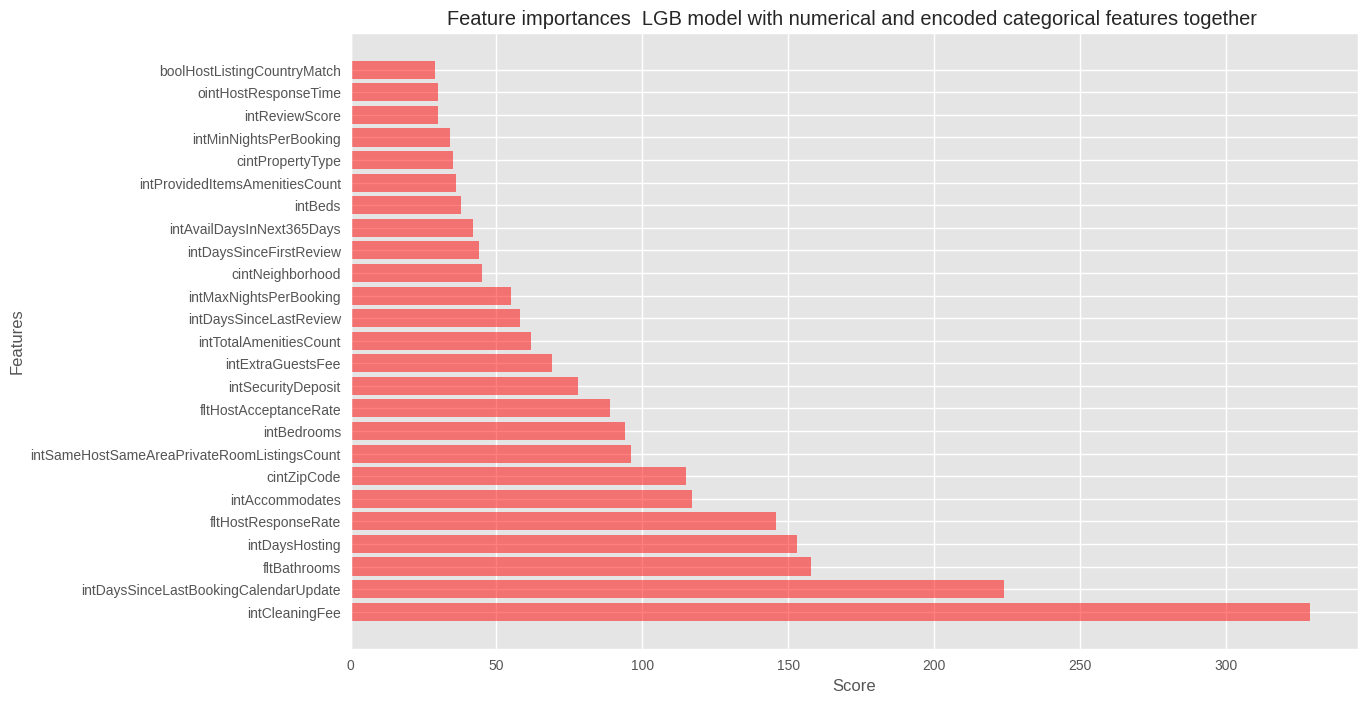

In [27]:
plot_features(X, model_lgb, " LGB model with numerical and encoded categorical features together ")

## Random Forest Model

In [81]:
# drop nulls, can handle a different way if needed, but we don't have many nulls
df_train_rf = df_train.dropna()
df_test_rf = df_test.dropna()

In [82]:
# get data ready for model inputs
exc =  ['intDailyPrice']

col = [i for i in col if i not in exc]
print('Number of columns is:', len(col))
print(col)

X = df_train_rf[col]
X_test = df_test_rf[col]
Y = df_train_rf['intDailyPrice']
Y_test = df_test_rf['intDailyPrice']

Number of columns is: 88
['boolInstantlyBookable', 'boolGuestProfilePicReqToBook', 'boolVerifiedGuestPhoneReqToBook', 'intDaysSinceFirstReview', 'intDaysSinceLastReview', 'intDaysSinceLastBookingCalendarUpdate', 'cintNeighborhood', 'cintZipCode', 'cintPropertyType', 'ointRoomType', 'cintBedType', 'cintCancelPolicy', 'intAccommodates', 'fltBathrooms', 'intBedrooms', 'intBeds', 'intGuestsIncluded', 'intMinNightsPerBooking', 'intMaxNightsPerBooking', 'intAvailDaysInNext30Days', 'intAvailDaysInNext60Days', 'intAvailDaysInNext90Days', 'intAvailDaysInNext365Days', 'intReviewScore', 'intReviewAccuracy', 'intCleanlinessReviewScore', 'intCheckInReviewScore', 'intCommunicationReviewScore', 'intLocationReviewScore', 'intValueReviewScore', 'intSameHostSameAreaListingsCount', 'intSameHostSameAreaEntireHomeListingsCount', 'intSameHostSameAreaPrivateRoomListingsCount', 'intSameHostSameAreaSharedRoomListingsCount', 'intSecurityDeposit', 'intCleaningFee', 'intExtraGuestsFee', 'intDaysHosting', 'boolHos

In [30]:
# model
rfm = RandomForestRegressor(n_estimators=30,                
                            #  criterion='mse' - mse is default. Options are: {'squared_error', 'friedman_mse', 'poisson', 'absolute_error'}
                            random_state=3, 
                            n_jobs=-1,
                            min_samples_leaf=3,
                            max_depth=5)
rfm.fit(X, Y)

RandomForestRegressor(max_depth=5, min_samples_leaf=3, n_estimators=30,
                      n_jobs=-1, random_state=3)

In [31]:
# prediction
rfm_train_preds = rfm.predict(X)
rfm_test_preds = rfm.predict(X_test)

# accuracy check
r2_train = r2_score(Y, rfm_train_preds)
mse_train = mean_squared_error(rfm_train_preds, Y)
rmse_train = sqrt(mean_squared_error(rfm_train_preds, Y))
print('Train data accuracy')
print("R2: %.4f" % r2_train)
print("MSE: %.2f" % mse_train)
print("RMSE: %.2f" % rmse_train) 

r2_test = r2_score(Y_test, rfm_test_preds)
mse_test = mean_squared_error(rfm_test_preds, Y_test)
rmse_test = sqrt(mean_squared_error(rfm_test_preds, Y_test))
print('Test data accuracy')
print("R2: %.4f" % r2_test)
print("MSE: %.2f" % mse_test)
print("RMSE: %.2f" % rmse_test) 

Train data accuracy
R2: 0.7248
MSE: 7436.97
RMSE: 86.24
Test data accuracy
R2: 0.6306
MSE: 6152.16
RMSE: 78.44


Plot feature importances…


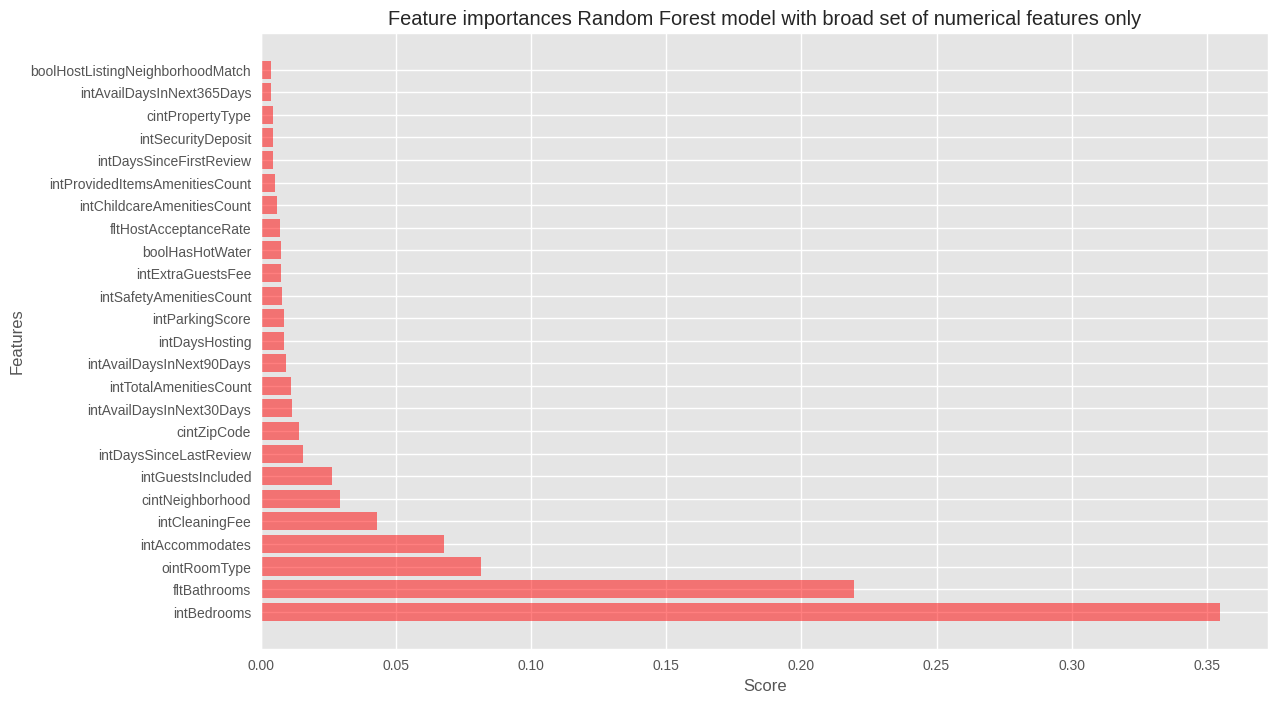

In [32]:
plot_features(X, rfm, "Random Forest model with broad set of numerical features only")

In [35]:
#remove lowest importance values and some of highly correlated, until we have the best result at the end
exc=  ['intAccommodates', 'ointRoomType', 'intCleaningFee', 'fltBathrooms', 'intBedrooms', 'intGuestsIncluded', 'cintZipCode', 'intDaysSinceFirstReview', 'intExtraGuestsFee']

col1 = [i for i in col if i in exc]
print('Number of columns is:', len(col1))
print(col1)
X = df_train_rf[col1]
X_test = df_test_rf[col1]

# model - reduced
rfm_r = RandomForestRegressor(n_estimators=30,                
                            #  criterion='mse' - mse is default. Options are: {'squared_error', 'friedman_mse', 'poisson', 'absolute_error'}
                            random_state=3, 
                            n_jobs=-1,
                            min_samples_leaf=3,
                            max_depth=5)
rfm_r.fit(X, Y)

Number of columns is: 9
['intDaysSinceFirstReview', 'cintZipCode', 'ointRoomType', 'intAccommodates', 'fltBathrooms', 'intBedrooms', 'intGuestsIncluded', 'intCleaningFee', 'intExtraGuestsFee']


RandomForestRegressor(max_depth=5, min_samples_leaf=3, n_estimators=30,
                      n_jobs=-1, random_state=3)

In [39]:
# prediction
rfm_train_preds = rfm_r.predict(X)
rfm_test_preds = rfm_r.predict(X_test)

# accuracy check
r2_train = r2_score(Y, rfm_train_preds)
mse_train = mean_squared_error(rfm_train_preds, Y)
rmse_train = sqrt(mean_squared_error(rfm_train_preds, Y))
print('Train data accuracy')
print("R2: %.4f" % r2_train)
print("MSE: %.2f" % mse_train)
print("RMSE: %.2f" % rmse_train) 

r2_test = r2_score(Y_test, rfm_test_preds)
mse_test = mean_squared_error(rfm_test_preds, Y_test)
rmse_test = sqrt(mean_squared_error(rfm_test_preds, Y_test))
print('Test data accuracy')
print("R2: %.4f" % r2_test)
print("MSE: %.2f" % mse_test)
print("RMSE: %.2f" % rmse_test) 

ValueError: ignored

## KNN 

In [130]:
# Handle nulls
# drop nulls, can handle a different way if needed, but we don't have many nulls
df_train_knn = df_train.dropna()
df_test_knn = df_test.dropna()
# df_train_knn = df_train
# df_test_knn = df_test
  

In [91]:
# impute missing values in X_train and X_test with respective column median in X_train
# for df1 in [df_train_knn, df_test_knn]:
#     for column in df_train_knn.columns:
#         col_median=df_train_knn[column].median()
#         df1[column].fillna(col_median, inplace=True) 

In [131]:
# get data ready for model inputs
exc =  ['intDailyPrice']

col = [i for i in col if i not in exc]
print('Number of columns is:', len(col))
print(col)


# standardize the data
scaler = StandardScaler()

X = scaler.fit_transform(df_train_knn[col])
X_test = scaler.transform(df_test_knn[col])
Y = df_train_knn['intDailyPrice']
Y_test = df_test_knn['intDailyPrice']

Number of columns is: 88
['boolInstantlyBookable', 'boolGuestProfilePicReqToBook', 'boolVerifiedGuestPhoneReqToBook', 'intDaysSinceFirstReview', 'intDaysSinceLastReview', 'intDaysSinceLastBookingCalendarUpdate', 'cintNeighborhood', 'cintZipCode', 'cintPropertyType', 'ointRoomType', 'cintBedType', 'cintCancelPolicy', 'intAccommodates', 'fltBathrooms', 'intBedrooms', 'intBeds', 'intGuestsIncluded', 'intMinNightsPerBooking', 'intMaxNightsPerBooking', 'intAvailDaysInNext30Days', 'intAvailDaysInNext60Days', 'intAvailDaysInNext90Days', 'intAvailDaysInNext365Days', 'intReviewScore', 'intReviewAccuracy', 'intCleanlinessReviewScore', 'intCheckInReviewScore', 'intCommunicationReviewScore', 'intLocationReviewScore', 'intValueReviewScore', 'intSameHostSameAreaListingsCount', 'intSameHostSameAreaEntireHomeListingsCount', 'intSameHostSameAreaPrivateRoomListingsCount', 'intSameHostSameAreaSharedRoomListingsCount', 'intSecurityDeposit', 'intCleaningFee', 'intExtraGuestsFee', 'intDaysHosting', 'boolHos

In [132]:
# Begin with a trial value for K around 3
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(X,Y)
pred=knn.predict(X_test)

In [133]:
# prediction
knn_train_preds = knn.predict(X)
knn_test_preds = knn.predict(X_test)

# accuracy check
r2_train = r2_score(Y, knn_train_preds)
mse_train = mean_squared_error(knn_train_preds, Y)
rmse_train = sqrt(mean_squared_error(knn_train_preds, Y))
print('Train data accuracy')
print("R2: %.4f" % r2_train)
print("MSE: %.2f" % mse_train)
print("RMSE: %.2f" % rmse_train) 

r2_test = r2_score(Y_test, knn_test_preds)
mse_test = mean_squared_error(knn_test_preds, Y_test)
rmse_test = sqrt(mean_squared_error(knn_test_preds, Y_test))
print('Test data accuracy')
print("R2: %.4f" % r2_test)
print("MSE: %.2f" % mse_test)
print("RMSE: %.2f" % rmse_test) 

Train data accuracy
R2: 0.7325
MSE: 7227.92
RMSE: 85.02
Test data accuracy
R2: 0.5165
MSE: 8051.73
RMSE: 89.73


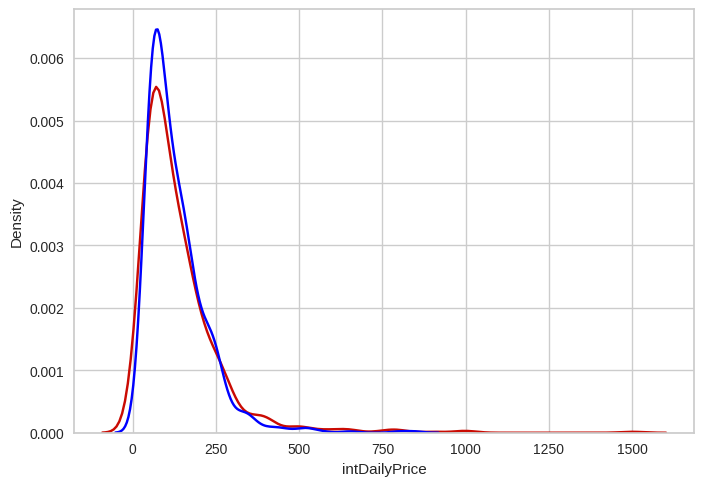

In [134]:
# Plotting the distribution plot
ax1=sns.distplot(Y_test,hist=False,color='r',label='actual value')
ax2=sns.distplot(pred,hist=False,color='blue',label='predicted value')

In [117]:
# Calculate RMSE for finding the optimal value of K
rmse=list()
rmse1=list()
new=list()
mylist=list(range(50))
mylist=list(filter(lambda x:x%2!=0,mylist))
for k in mylist:
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(X,Y)
    pred=knn.predict(X_test)
    pred1=knn.predict(X)
    error=sqrt(mean_squared_error(Y_test,pred)) 
    error1=sqrt(mean_squared_error(Y,pred1))
    rmse.append(error)
    new.append([error,k])
    rmse1.append(error1)
    print('RMSE test value for k= ' , k , 'is:', error, '\nRMSE train value for k is = ',error1)

RMSE test value for k=  1 is: 328.9347575743318 
RMSE train value for k is =  0.4744146415084196
RMSE test value for k=  3 is: 332.5172391630819 
RMSE train value for k is =  175.542088224964
RMSE test value for k=  5 is: 377.4271817666716 
RMSE train value for k is =  202.22596955672606
RMSE test value for k=  7 is: 401.334927903895 
RMSE train value for k is =  220.21614961767384
RMSE test value for k=  9 is: 417.0280470835722 
RMSE train value for k is =  227.70271679761115
RMSE test value for k=  11 is: 429.659446200659 
RMSE train value for k is =  235.63199771172714
RMSE test value for k=  13 is: 438.128779805602 
RMSE train value for k is =  240.56917932192664
RMSE test value for k=  15 is: 443.26526713910613 
RMSE train value for k is =  244.07355749475207
RMSE test value for k=  17 is: 447.21131208697403 
RMSE train value for k is =  247.48664108048192
RMSE test value for k=  19 is: 451.1261262618792 
RMSE train value for k is =  249.94136624515144
RMSE test value for k=  21 i

In [118]:
# Creating a list of RMSE values
newList=list()
for x in mylist:
    newList.append(1/x)

In [119]:
# Finding the minimum RMSE for testing data,which is optimal K value
Rmsetest=min(new)
print("Minimum R squared test error=",Rmsetest[0])
Rmsetrain=min(rmse1)
print("Minimum R squared train error=",Rmsetrain)
print("Optimal K value= ",Rmsetest[1])

Minimum R squared test error= 328.9347575743318
Minimum R squared train error= 0.4744146415084196
Optimal K value=  1


Text(0, 0.5, 'R squared test error')

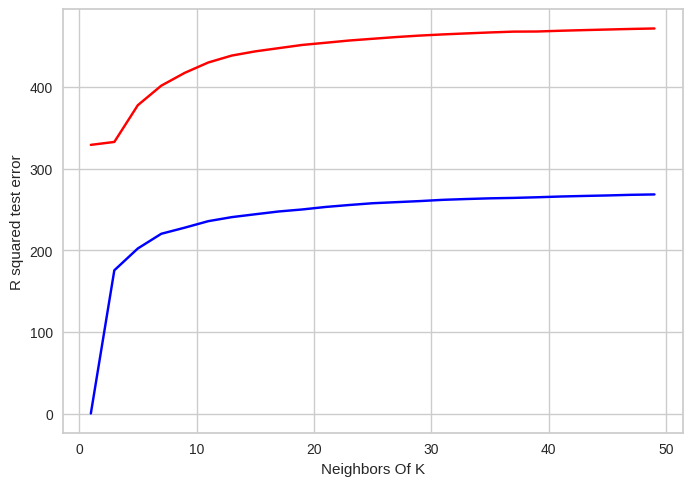

In [120]:
# Plot graph between RMSE value and K value
plt.plot(mylist,rmse,color='red')
plt.plot(mylist,rmse1,color='blue')
plt.xlabel('Neighbors Of K')
plt.ylabel('R squared test error')

In [110]:
# find R2 with optimal K
knn_optimal=KNeighborsRegressor(n_neighbors=15)
knn_optimal.fit(X,Y)

KNeighborsRegressor(n_neighbors=15)

In [111]:
# prediction
knn_train_preds = knn_optimal.predict(X)
knn_test_preds = knn_optimal.predict(X_test)

# accuracy check
r2_train = r2_score(Y, knn_train_preds)
mse_train = mean_squared_error(knn_train_preds, Y)
rmse_train = sqrt(mean_squared_error(knn_train_preds, Y))
print('Train data accuracy')
print("R2: %.4f" % r2_train)
print("MSE: %.2f" % mse_train)
print("RMSE: %.2f" % rmse_train) 

r2_test = r2_score(Y_test, knn_test_preds)
mse_test = mean_squared_error(knn_test_preds, Y_test)
rmse_test = sqrt(mean_squared_error(knn_test_preds, Y_test))
print('Test data accuracy')
print("R2: %.4f" % r2_test)
print("MSE: %.2f" % mse_test)
print("RMSE: %.2f" % rmse_test) 

Train data accuracy
R2: 0.3616
MSE: 59571.90
RMSE: 244.07
Test data accuracy
R2: 0.2020
MSE: 196484.10
RMSE: 443.27


Extreme Gradient Boosting

In [54]:
exc =  ['intDailyPrice']

col = [i for i in col if i not in exc]
print('Number of columns is:', len(col))
print(col)

X_train_df = df_train[col]
X_test_df = df_test[col]
Y_train_label = df_train['intDailyPrice']
Y_test_label = df_test['intDailyPrice']

dtrain = xgb.DMatrix(X_train_df, label=Y_train_label)
dtest = xgb.DMatrix(X_test_df, label=Y_test_label)

Number of columns is: 88
['boolInstantlyBookable', 'boolGuestProfilePicReqToBook', 'boolVerifiedGuestPhoneReqToBook', 'intDaysSinceFirstReview', 'intDaysSinceLastReview', 'intDaysSinceLastBookingCalendarUpdate', 'cintNeighborhood', 'cintZipCode', 'cintPropertyType', 'ointRoomType', 'cintBedType', 'cintCancelPolicy', 'intAccommodates', 'fltBathrooms', 'intBedrooms', 'intBeds', 'intGuestsIncluded', 'intMinNightsPerBooking', 'intMaxNightsPerBooking', 'intAvailDaysInNext30Days', 'intAvailDaysInNext60Days', 'intAvailDaysInNext90Days', 'intAvailDaysInNext365Days', 'intReviewScore', 'intReviewAccuracy', 'intCleanlinessReviewScore', 'intCheckInReviewScore', 'intCommunicationReviewScore', 'intLocationReviewScore', 'intValueReviewScore', 'intSameHostSameAreaListingsCount', 'intSameHostSameAreaEntireHomeListingsCount', 'intSameHostSameAreaPrivateRoomListingsCount', 'intSameHostSameAreaSharedRoomListingsCount', 'intSecurityDeposit', 'intCleaningFee', 'intExtraGuestsFee', 'intDaysHosting', 'boolHos

In [55]:
# Parameter dictionary specifying base learner
param = [('max_depth', 4), ('objective', 'reg:squarederror'), ('eval_metric', 'rmse'), ('eval_metric', 'mae'), ('eval_metric', 'mape'),
         ('early_stopping_rounds', 50)]

num_round = 500
watchlist = [(dtrain,'train'), (dtest,'eval')]

evals_result = {}
bst = xgb.train(param, dtrain, num_round, watchlist, evals_result=evals_result)

print('Access RMSE metric directly from evals_result:')
print(evals_result['eval']['rmse'])

print('Access MAE metric directly from evals_result:')
print(evals_result['eval']['mae'])

print('Access MAPE metric directly from evals_result:')
print(evals_result['eval']['mape'])

# Instantiate an XGBoost object with hyperparameters
param = [('max_depth', 4), ('objective', 'reg:squarederror'), ('eval_metric', 'rmse'), ('eval_metric', 'mae'), ('eval_metric', 'mape'),
         ('early_stopping_rounds', 50),('learning_rate', 0.1),('n_jobs',4),('booster','gbtree')]

num_round = 500
watchlist = [(dtrain,'train'), (dtest,'eval')]

evals_result = {}

[21:31:05] WARNING: ../src/learner.cc:767: 
Parameters: { "early_stopping_rounds" } are not used.

[0]	train-rmse:299.38758	train-mae:112.52703	train-mape:0.61919	eval-rmse:499.63273	eval-mae:126.12164	eval-mape:0.62055
[1]	train-rmse:270.98865	train-mae:83.55025	train-mape:0.42987	eval-rmse:487.16415	eval-mae:99.59789	eval-mape:0.44601
[2]	train-rmse:254.54384	train-mae:68.87638	train-mape:0.38183	eval-rmse:480.57172	eval-mae:86.66015	eval-mape:0.40156
[3]	train-rmse:218.65460	train-mae:61.06886	train-mape:0.36678	eval-rmse:394.51458	eval-mae:76.03861	eval-mape:0.38665
[4]	train-rmse:205.44109	train-mae:58.17933	train-mape:0.38977	eval-rmse:378.80822	eval-mae:74.25923	eval-mape:0.42616
[5]	train-rmse:199.21955	train-mae:57.17642	train-mape:0.40947	eval-rmse:376.07466	eval-mae:73.71138	eval-mape:0.44603
[6]	train-rmse:195.44838	train-mae:56.76975	train-mape:0.43053	eval-rmse:375.42352	eval-mae:74.08674	eval-mape:0.46790
[7]	train-rmse:190.70156	train-mae:55.89794	train-mape:0.43949	eva


In Sample RMSE:  146.68

In Sample R-Squared:  0.77

Out of Sample RMSE:  303.92

Out of Sample R-Squared:  0.62

Prediction Error Plot


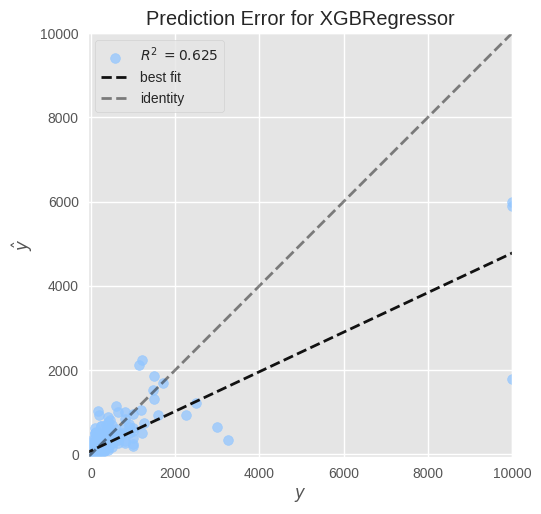

PredictionError(ax=<Axes: title={'center': 'Prediction Error for XGBRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>,
                estimator=XGBRegressor(base_score=None, booster='gbtree',
                                       callbacks=None, colsample_bylevel=None,
                                       colsample_bynode=None,
                                       colsample_bytree=None,
                                       early_stopping_rounds=None,
                                       enable_categorical=False,
                                       eval_metric=None, feature_types=None,
                                       gamma=None, gpu_...
                                       grow_policy=None, importance_type=None,
                                       interaction_constraints=None,
                                       learning_rate=0.001, max_bin=None,
                                       max_cat_threshold=None,
                                       max_cat_to_one

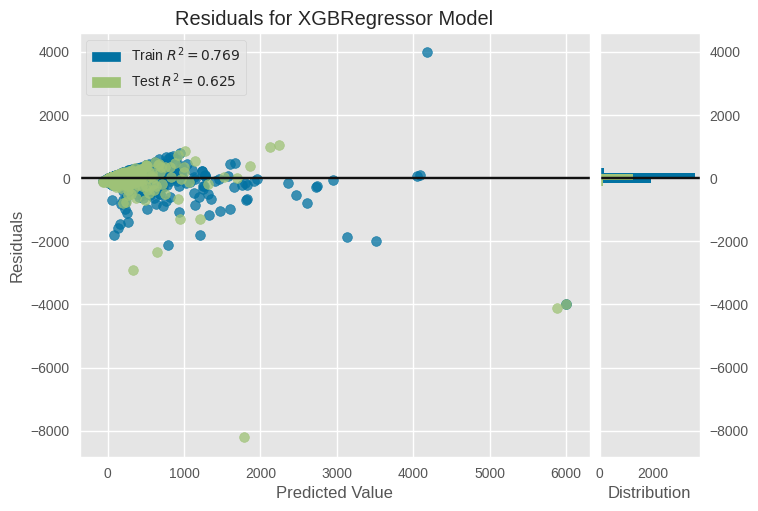

YellowbrickAttributeError: ignored

In [56]:

xgb_reg = xgb.XGBRegressor(max_depth=2, n_estimators=50000, n_jobs=4,
                           objectvie='reg:squarederror', verbosity = 0,silent=True,
                           booster='gbtree', random_state=42, learning_rate=0.001)

# Train the model with train data sets
xgb_reg.fit(X_train_df, Y_train_label,
            eval_set=[(X_train_df, Y_train_label), (X_test_df, Y_test_label)],
            early_stopping_rounds=100, verbose=0)

y_train_pred = xgb_reg.predict(X_train_df) # Predictions
y_train_true = Y_train_label # True values

Train_MSE = mean_squared_error(y_train_true, y_train_pred)
Train_RMSE = np.sqrt(Train_MSE)

Train_R_squared = r2_score(y_train_true, y_train_pred)

print("\nIn Sample RMSE: ", np.round(Train_RMSE, 2))
print()
print("In Sample R-Squared: ", np.round(Train_R_squared, 2))

y_test_pred = xgb_reg.predict(X_test_df) # Predictions
y_test_true = Y_test_label # True values

Test_MSE = mean_squared_error(y_test_true, y_test_pred)
Test_RMSE = np.sqrt(Test_MSE)

Test_R_squared = r2_score(y_test_true, y_test_pred)

print("\nOut of Sample RMSE: ", np.round(Test_RMSE, 2))
print()
print("Out of Sample R-Squared: ", np.round(Test_R_squared, 2))

# Making the Prediction Error Plot
print("\nPrediction Error Plot")
print(prediction_error(xgb_reg, X_train_df, Y_train_label, X_test_df, Y_test_label))

# Making the Residuals Plot
print("\nResiduals Plot")
print(residuals_plot(xgb_reg, X_train_df, Y_train_label, X_test_df, Y_test_label))


In [ ]:
results = xgb_reg.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["rmse"], label="Training loss")
plt.plot(results["validation_1"]["rmse"], label="Validation loss")
plt.axvline(21, color="gray", label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

In [ ]:
xgb2 = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
             colsample_bynode=0.6, colsample_bytree=0.2, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.001, max_delta_step=0, max_depth=14,
             min_child_weight=14, monotone_constraints='()',
             n_estimators=100000, n_jobs=36, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

# Train the model with train data sets
xgb2.fit(X_train_df, Y_train_label,
            eval_set=[(X_train_df, Y_train_label), (X_test_df, Y_test_label)],
            early_stopping_rounds=1000, verbose=1000)

y_train_pred = xgb2.predict(X_train_df) # Predictions
y_train_true = Y_train_label # True values

Train_MSE = mean_squared_error(y_train_true, y_train_pred)
Train_RMSE = np.sqrt(Train_MSE)

Train_R_squared = r2_score(y_train_true, y_train_pred)

print("\nIn Sample RMSE: ", np.round(Train_RMSE, 2))
print()
print("In Sample R-Squared: ", np.round(Train_R_squared, 2))

y_test_pred = xgb2.predict(X_test_df) # Predictions
y_test_true = Y_test_label # True values

Test_MSE = mean_squared_error(y_test_true, y_test_pred)
Test_RMSE = np.sqrt(Test_MSE)

Test_R_squared = r2_score(y_test_true, y_test_pred)

print("\nOut of Sample RMSE: ", np.round(Test_RMSE, 2))
print()
print("Out of Sample R-Squared: ", np.round(Test_R_squared, 2))

In [ ]:
results = xgb2.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["rmse"], label="Training loss")
plt.plot(results["validation_1"]["rmse"], label="Validation loss")
plt.axvline(21, color="gray", label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

print(xgb2.best_ntree_limit)